# Support Vector Machines (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets

## Kernels

Non-linear SVM is used when the data can’t be separated using a straight line

In [2]:
#Non-Linearly separable data
X,y = datasets.make_circles(n_samples=50, factor=.5,
                                      noise=.05)

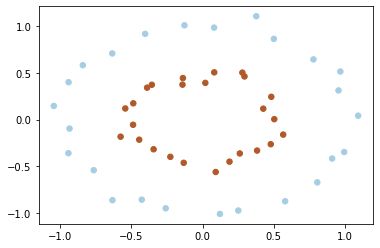

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [4]:
c = 1
clf = svm.SVC(kernel='linear', C=c)
clf.fit(X, y)

SVC(C=1, kernel='linear')

Data can’t be separated using a straight line

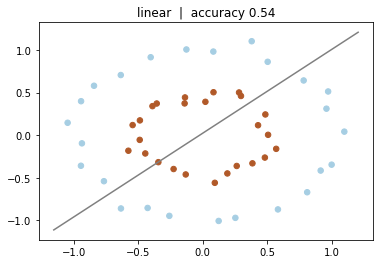

In [5]:
#plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)


plt.plot(xx, yy, c='grey')
plt.title(f"linear  |  accuracy {clf.score(X,y)}")
plt.show()


#### We use kernel functions in this case that help transform the data into another dimension that has a clear dividing margin between the two classes. Kernel functions help transform non-linear spaces into linear spaces.

### Poly Kernel

In [6]:
clf = svm.SVC(C=10, kernel='poly', degree=3, gamma=2)
clf.fit(X, y)

SVC(C=10, gamma=2, kernel='poly')

#### Lets check how *Degree* parameter affect the Decision Boundary

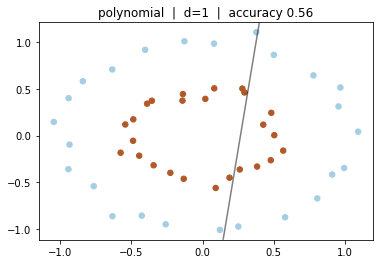

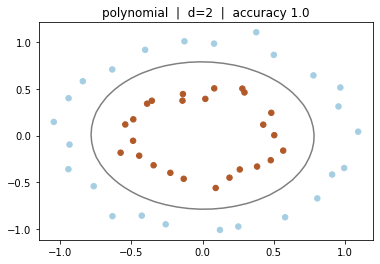

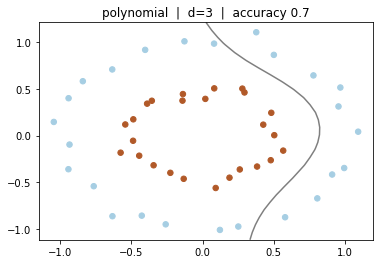

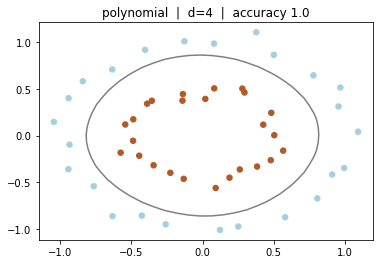

In [7]:
Ds = range(1,5)
for d in Ds:
        # fit the model, don't regularize for illustration purposes
        clf = svm.SVC(C=10, kernel='poly', degree=d, gamma=1)
        clf.fit(X, y)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                   linestyles=['-'])

        plt.title("Hyperplane & Margin with Degree=%s"%d)
        plt.title(f"polynomial  |  d={d}  |  accuracy {clf.score(X,y)}")
        plt.show()